## Project Data Science

In [2]:
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=e6bacb4bb4ae7701548d6dedd9d98380e7c1ab10a24a751dbdbb1c5432bf3e2b
  Stored in directory: /root/.cache/pip/wheels/cd/ef/ae/073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
from word2number import w2n
import re
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read data
df = pd.read_csv("DataSet_Project.csv")

In [5]:
df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns
columns_to_keep = [
    'Age', 'Hobbies', 'Number of countries visited in lifetime',
    'Number of brand new pairs of shoes owned', 'Relationship Status',
    'Monthly stipend', 'Preference for indoor or outdoor activities',
    'Monthly expenditure', 'Preference for eating at home or out',
    'Gender', 'Party Person (Yes/No)', 'Employment Status',
    'Movie-watching location', 'Number of shopping trips per month'
]
df = df.loc[:, columns_to_keep]
df.columns

Index(['Age', 'Hobbies', 'Number of countries visited in lifetime',
       'Number of brand new pairs of shoes owned', 'Relationship Status',
       'Monthly stipend', 'Preference for indoor or outdoor activities',
       'Monthly expenditure', 'Preference for eating at home or out', 'Gender',
       'Party Person (Yes/No)', 'Employment Status', 'Movie-watching location',
       'Number of shopping trips per month'],
      dtype='object')

In [6]:
df.describe()
df.head(10)

,Age,Hobbies,Number of countries visited in lifetime,Number of brand new pairs of shoes owned,Relationship Status,Monthly stipend,Preference for indoor or outdoor activities,Monthly expenditure,Preference for eating at home or out,Gender,Party Person (Yes/No),Employment Status,Movie-watching location,Number of shopping trips per month
0,42,cooking,2,0,No,NaN,Both,NaN,NaN,NaN,NaN,Yes,Netflix or other streaming platforms,NaN
1,26,Playing games,3,~7 (I never wore them),Yes,0,Indoor,200-500,Eating out,Female,No,No,Netflix or other streaming platforms,1
2,25,Drawing,2,2,No,800,Outdoor,600,Eating at Home,Male,Yes,Yes,My own computer,4
3,23,none,2,0,No,0,Indoor,0,Eating at Home,male,No,No,Netflix or other streaming platforms,0
4,23,3d printing,2,2,Yes,0,Indoor,1500,Eating out,Male,No,No,My own computer,8
5,Huy Nguyen,Coding,2,0,Yes,0,Both,150,Eating out,Men,Yes,No,Netflix or other streaming platforms,0
6,24,Travelling,4,3,No,1200,Both,1000,Eating at Home,Female,Yes,No,Netflix or other streaming platforms,1
7,22,Writing,8,2,No,NaN,Both,NaN,Eating at Home,Female,Yes,No,My own computer,2
8,21,Music Production,3,"They’re all relatively used, ha.",No,NaN,Both,"~ $200, give or take",Eating at Home,Male,No,No,My own computer,5
9,21,Video games,1,1,No,0,Indoor,150,Eating at Home,Male,No,Yes,My own computer,0


#### Cleaning of the data for the columns required

In [7]:
# Keep only digits and remove all other characters
def keep_digi(col):
    df[col] = df[col].str.replace('[^\d]+', '', regex=True)
    return df

# If blank convert to nan
def convert_nan(col):
    df[col] = df[col].replace('', np.nan)
    return df

# Keep only alphabets
def keep_alpha(col):
    df[col] = df[col].str.extract(r'([a-zA-Z]+)')
    return df

# Filling the missing value by mode for Age Column
def fill_missing_mode(col):
    df[col].fillna(df[col].mode()[0], inplace=True)


#### Cleaning for column Age

In [8]:
keep_digi('Age')
df.loc[5]
convert_nan('Age')
df.loc[5]
fill_missing_mode('Age')
df.loc[5]

,5
Age,23
Hobbies,Coding
Number of countries visited in lifetime,2
Number of brand new pairs of shoes owned,0
Relationship Status,Yes
Monthly stipend,0
Preference for indoor or outdoor activities,Both
Monthly expenditure,150
Preference for eating at home or out,Eating out
Gender,Men


#### Functions for column : Number of countries visited in lifetime

In [9]:
def convert_word_to_num_col(col):
    def convert_word_to_num(value):
        if isinstance(value, str):  # Check if the value is a string (word representation)
            try:
                value = value.strip()
                return w2n.word_to_num(value)
            except ValueError:
                return value  # Return the word unchanged if it can't be converted
        else:
            return value  # Return numerical values unchanged

    # Apply the function to the 'Numbers' column
    df[col] = df[col].apply(convert_word_to_num)

# Replace Countries by space
def replace_country_incol(value):
        if isinstance(value, str):
            value = value.replace(" countries", '')
            if value.isdigit():
                return int(value)
            else:
                return value
        else:
            return value

In [10]:
def count_countries_country(col):
    countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
    'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
    'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde',
    'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
    'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
    'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini',
    'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
    'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
    'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo',
    'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania',
    'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius',
    'Mexico', 'Micronesia', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia',
    'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Korea', 'North Macedonia', 'Norway',
    'Oman', 'Pakistan', 'Palau', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland',
    'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines',
    'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore',
    'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Korea', 'South Sudan', 'Spain', 'Sri Lanka',
    'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo',
    'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates',
    'United Kingdom', 'United States','US','USA','UK', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican City', 'Venezuela', 'Vietnam', 'Yemen',
    'Zambia', 'Zimbabwe'
]
    def replace_with_count(value):
        if isinstance(value, str):# Check if the value is a string (combined country names)
            return sum(country in value.replace(' ', '').split(',') for country in countries)
        else:  # If the value is not a string (numerical count), return it unchanged
            return value


    df[col] = df[col].apply(replace_with_count)

In [11]:
pd.set_option('display.max_rows', None)
df['Number of countries visited in lifetime']

,Number of countries visited in lifetime
0,2
1,3
2,2
3,2
4,2
5,2
6,4
7,8
8,3
9,1


In [12]:
convert_word_to_num_col('Number of countries visited in lifetime')
df['Number of countries visited in lifetime'] = df['Number of countries visited in lifetime'].apply(replace_country_incol)
count_countries_country('Number of countries visited in lifetime')
df['Number of countries visited in lifetime'].fillna(1, inplace=True)
df['Number of countries visited in lifetime'] = df['Number of countries visited in lifetime'].replace(0, 1)

In [13]:
df['Number of countries visited in lifetime'].unique()

array([ 2.,  3.,  4.,  8.,  1., 26.,  6.,  5., 11., 10.,  7., 19.])

In [14]:
pd.set_option('display.max_rows', None)
df['Number of countries visited in lifetime']

,Number of countries visited in lifetime
0,2.0
1,3.0
2,2.0
3,2.0
4,2.0
5,2.0
6,4.0
7,8.0
8,3.0
9,1.0


In [15]:
pd.set_option('display.max_rows', None)
df['Number of brand new pairs of shoes owned']

,Number of brand new pairs of shoes owned
0,0
1,~7 (I never wore them)
2,2
3,0
4,2
5,0
6,3
7,2
8,"They’re all relatively used, ha."
9,1


In [16]:
def handle_range(value):
    if isinstance(value, str):  # Check if the value is a string (word representation)
        value = value.replace(' ','')
        value = value.replace('to','-')
        value = value.replace('~','-')
        value = re.sub(r'[^0-9-]', '', value)
        if '-' in value:
            nums = [int(part) for part in value.split('-') if part.isdigit()]
            if len(nums)!= 0:
                return max(nums)
        return value
    else:
        return value

In [17]:
df['Number of brand new pairs of shoes owned'] = df['Number of brand new pairs of shoes owned'].apply(handle_range)
df['Number of brand new pairs of shoes owned'] = pd.to_numeric(df['Number of brand new pairs of shoes owned'], errors='coerce')
df['Number of brand new pairs of shoes owned'].fillna(0, inplace=True)

In [18]:
df['Number of brand new pairs of shoes owned'].unique()

array([ 0.,  7.,  2.,  3.,  1.,  6.,  5., 20., 10., 18.,  4.,  8., 15.,
       14.,  9.])

In [19]:
pd.set_option('display.max_rows', None)
df['Number of brand new pairs of shoes owned']

,Number of brand new pairs of shoes owned
0,0.0
1,7.0
2,2.0
3,0.0
4,2.0
5,0.0
6,3.0
7,2.0
8,0.0
9,1.0


In [20]:
df['Relationship Status'].fillna('Maybe', inplace=True)
df['Relationship Status'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [21]:
pd.set_option('display.max_rows', None)
df['Monthly stipend']


,Monthly stipend
0,NaN
1,0
2,800
3,0
4,0
5,0
6,1200
7,NaN
8,NaN
9,0


In [22]:

df['Monthly stipend'] = df['Monthly stipend'].apply(handle_range)
df['Monthly stipend'] = pd.to_numeric(df['Monthly stipend'], errors='coerce')
df['Monthly stipend'].fillna(0, inplace=True)
df['Monthly stipend'] = df['Monthly stipend'].replace(0, 500)

df['Monthly stipend'].unique()


array([  500.,   800.,  1200.,   350.,   700.,   300.,  1000.,   600.,
         250.,  1800.,  4000.,  1300., 30000.,   200.,  2000.,  1250.,
         400.,   544.,  1500.,   944.])

#### Data cleaning for monthly expenditure

In [23]:
# Function to replace missing values with "NaN" string
def replace_missing_values(df, column_name):
    df[column_name].replace(['None', 'NA', 'na', np.nan], 'NaN', inplace=True)
    return df

# Function to replace "1k" with "1000"
def replace_1k(df, column_name):
    df[column_name] = df[column_name].str.replace(r'1k', '1000', regex=False)
    return df

# Function to remove currency symbols, special symbols, text like "idk", "give or take", and commas
def remove_symbols(df, column_name):
    df[column_name] = df[column_name].str.replace(r'[\$,]|[\w\s]*(~|idk|give\s*or\s*take)|,', '', regex=True)
    df[column_name] = df[column_name].str.replace(r'[\s]*(usd|USD|idk|dollar(s)?)|K[\s]*', '', regex=True)
    return df

# Function to handle range values like "200-500" by calculating the mean of the range
def handle_range_values(df, column_name):
    def process_range(value):
        if '-' in str(value):
            range_values = [int(x.strip()) for x in str(value).split('-') if x.strip().isdigit() != 'NaN']
            return int(np.mean(range_values))
        else:
            return value

    df[column_name] = df[column_name].apply(process_range)
    return df

# Function to replace missing values with 0
def replace_nan_with_zero(df, column_name):
    df[column_name].replace('NaN', 0, inplace=True)
    return df


# Function to handle empty rows by replacing them with 0
def handle_empty_rows(df, column_name):
    df[column_name].replace('', 0, inplace=True)
    return df


# Function to clean the 'Monthly expenditure' column
def clean_monthly_expenditure(df, column_name):
    df = replace_missing_values(df, column_name)
    df = replace_1k(df, column_name)
    df = remove_symbols(df, column_name)
    df = handle_range_values(df, column_name)
    df = replace_nan_with_zero(df, column_name)
    df = handle_empty_rows(df,column_name)

    return df

# Clean the 'Monthly expenditure' column
#df['Monthly expenditure'] = df['Monthly expenditure'].fillna(0)
df['Monthly expenditure'] = df['Monthly expenditure'].replace('Dec-24',0)
df = clean_monthly_expenditure(df, 'Monthly expenditure')
df['Monthly expenditure'] = pd.to_numeric(df['Monthly expenditure'], errors='coerce')
df['Monthly expenditure'].fillna(0, inplace=True)
df['Monthly expenditure'] = df['Monthly expenditure'].replace(0, 100)

# Print the cleaned data
print(df['Monthly expenditure'])


0       100.00
1       350.00
2       600.00
3       100.00
4      1500.00
5       150.00
6      1000.00
7       100.00
8       200.00
9       150.00
10      850.00
11      600.00
12     1300.00
13      200.00
14      300.00
15      200.00
16     3000.00
17      100.00
18      150.00
19      500.00
20      500.00
21      200.00
22      100.00
23      400.00
24      600.00
25     1000.00
26      700.00
27      500.00
28      601.00
29       50.00
30      300.00
31      800.00
32      400.00
33     1000.00
34      800.00
35     1500.00
36     1300.00
37     2000.00
38        1.00
39      400.00
40     2500.00
41     1300.00
42      800.00
43      100.00
44      100.00
45      100.00
46      600.00
47      100.00
48     1000.00
49      100.00
50      100.00
51      450.00
52      500.00
53      600.00
54      500.00
55      100.00
56     1500.00
57      550.00
58       80.00
59     1000.00
60      100.00
61      100.00
62      900.00
63      600.00
64      500.00
65      600.00
66      50

In [24]:
#pd.set_option('display.max_rows', None)
df['Monthly expenditure']

,Monthly expenditure
0,100.00
1,350.00
2,600.00
3,100.00
4,1500.00
5,150.00
6,1000.00
7,100.00
8,200.00
9,150.00


#### Cleaning for Preference for eating at home or out

In [25]:
def replace_with_mode(df, column_name):
    mode_value = df[column_name].mode()[0]
    df[column_name].fillna(mode_value, inplace=True)

    # Convert the column to categorical data type
    df[column_name] = df[column_name].str.strip().astype('category')

    return df

df = replace_with_mode(df, 'Preference for eating at home or out')

print(df['Preference for eating at home or out'])

0      Eating at Home
1          Eating out
2      Eating at Home
3      Eating at Home
4          Eating out
5          Eating out
6      Eating at Home
7      Eating at Home
8      Eating at Home
9      Eating at Home
10         Eating out
11         Eating out
12     Eating at Home
13     Eating at Home
14     Eating at Home
15         Eating out
16     Eating at Home
17     Eating at Home
18         Eating out
19         Eating out
20     Eating at Home
21     Eating at Home
22     Eating at Home
23         Eating out
24         Eating out
25     Eating at Home
26     Eating at Home
27     Eating at Home
28     Eating at Home
29     Eating at Home
30     Eating at Home
31         Eating out
32     Eating at Home
33     Eating at Home
34         Eating out
35         Eating out
36     Eating at Home
37     Eating at Home
38         Eating out
39     Eating at Home
40     Eating at Home
41     Eating at Home
42     Eating at Home
43     Eating at Home
44     Eating at Home
45     Eat

#### Data cleaning for Party Person

In [26]:
df = replace_with_mode(df, 'Party Person (Yes/No)')
print(df['Party Person (Yes/No)'])

0      Yes
1       No
2      Yes
3       No
4       No
5      Yes
6      Yes
7      Yes
8       No
9       No
10     Yes
11      No
12      No
13      No
14      No
15      No
16      No
17     Yes
18      No
19      No
20      No
21      No
22      No
23      No
24     Yes
25      No
26      No
27      No
28      No
29      No
30      No
31      No
32     Yes
33      No
34      No
35     Yes
36      No
37      No
38     Yes
39      No
40     Yes
41      No
42      No
43     Yes
44      No
45      No
46      No
47     Yes
48     Yes
49     Yes
50     Yes
51     Yes
52     Yes
53      No
54      No
55     Yes
56     Yes
57      No
58     Yes
59     Yes
60     Yes
61     Yes
62     Yes
63     Yes
64     Yes
65      No
66     Yes
67     Yes
68     Yes
69     Yes
70     Yes
71     Yes
72     Yes
73     Yes
74      No
75     Yes
76     Yes
77     Yes
78      No
79      No
80     Yes
81     Yes
82      No
83     Yes
84      No
85     Yes
86      No
87      No
88      No
89     Yes
90      No

#### Cleaning Gender

In [27]:
def clean_gender(df, column_name):

    df[column_name] = df[column_name].str.strip()

    male_patterns = r'\b(?:Male|male|MALE|Male |Men|M)\b'
    female_patterns = r'\b(?:Female|female|Femalw|Female )\b'

    gender_mapping = {
        male_patterns: 1,
        female_patterns: 2,
    }

    for pattern, value in gender_mapping.items():
        df[column_name] = df[column_name].str.replace(pattern, str(value), regex=True)

    # Replace any other text with 0
    df[column_name] = df[column_name].apply(lambda x: 0 if not str(x).isdigit() else x)

    return df

    # Handle missing values
    df[column_name].fillna(0, inplace=True)

    return df


df = clean_gender(df, 'Gender')
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')
print(df['Gender'])

0      0
1      2
2      1
3      1
4      1
5      1
6      2
7      2
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     2
21     2
22     1
23     1
24     1
25     1
26     2
27     1
28     0
29     2
30     1
31     1
32     1
33     1
34     2
35     2
36     1
37     1
38     1
39     1
40     1
41     2
42     1
43     2
44     1
45     2
46     1
47     2
48     2
49     0
50     2
51     1
52     1
53     2
54     2
55     2
56     2
57     2
58     1
59     2
60     2
61     2
62     1
63     1
64     1
65     2
66     2
67     1
68     2
69     1
70     1
71     2
72     2
73     1
74     2
75     1
76     2
77     1
78     2
79     1
80     1
81     1
82     2
83     1
84     2
85     1
86     2
87     1
88     1
89     1
90     1
91     2
92     1
93     1
94     2
95     2
96     2
97     1
98     2
99     1
100    1
101    2
102    1
103    2
104    2
105    2
106    1
107    1
108    2
109    1
110    2
1

#### Cleaning of Employment Status

In [28]:
df['Employment Status'] = df['Employment Status'].fillna('yes')

# Step 3: Standardize values
df['Employment Status'] = df['Employment Status'].str.lower()  # Convert values to lowercase

# Step 4: Convert to binary
df['Employment Status'] = df['Employment Status'].map({'yes': 1, 'no': 0})

#### Cleaning on Movie-watching location

In [29]:
df['Movie-watching location'] = df['Movie-watching location'].str.strip()

df['Movie-watching location'] = df['Movie-watching location'].str.lower()
# Step 3: Replace variations of similar categories
df['Movie-watching location'].replace({
    'netflix or other streaming platforms': 'netflix',
    'my own computer': 'computer',
    'movies': 'theater',
    'youtube': 'online'
}, inplace=True)
fill_missing_mode('Movie-watching location')
df['Movie-watching location'].unique()

array(['netflix', 'computer', 'online', 'other', 'theater'], dtype=object)

#### Cleaning Number of shopping trips per month

In [30]:
def map_values(value):
    if value == 'maybe 1' or value == 'One':
        return 1
    elif value == '1-2' or value == '1 or 2'or value == 'twice in a month':
        return 2
    elif value == '2-3':
        return 3
    elif value == '3-4':
        return 4
    elif value == '4-5':
        return 5
    elif value == 'None' or value == 'No' or value == "":
        return 0
    else:
        # Return the original value if it doesn't match any condition
        return value

# Apply the mapping function to the column
df['Number of shopping trips per month'] = df['Number of shopping trips per month'].apply(map_values)

# Convert the values to numeric format
df['Number of shopping trips per month'] = pd.to_numeric(df['Number of shopping trips per month'], errors='coerce')
df['Number of shopping trips per month'] = df['Number of shopping trips per month'].fillna(0)
df['Number of shopping trips per month'].unique()

array([ 0.,  1.,  4.,  8.,  2.,  5., 10.,  3.,  7.,  6.])

In [31]:
Q1 = df['Monthly expenditure'].quantile(0.25)
Q2 = df['Monthly expenditure'].quantile(0.70)
#Q3 = df['Monthly expenditure'].quantile(0.)

df['Expenditure Category'] = 'Unknown'

# Assign category labels based on expenditure ranges
df.loc[df['Monthly expenditure'] <= Q1, 'Expenditure Category'] = 'Low'
df.loc[(df['Monthly expenditure'] > Q1) & (df['Monthly expenditure'] <= Q2), 'Expenditure Category'] = 'Medium'
df.loc[df['Monthly expenditure'] > Q2, 'Expenditure Category'] = 'High'

# Print the updated DataFrame
print(df[['Monthly expenditure', 'Expenditure Category']])



     Monthly expenditure Expenditure Category
0                 100.00                  Low
1                 350.00               Medium
2                 600.00               Medium
3                 100.00                  Low
4                1500.00                 High
5                 150.00                  Low
6                1000.00                 High
7                 100.00                  Low
8                 200.00                  Low
9                 150.00                  Low
10                850.00                 High
11                600.00               Medium
12               1300.00                 High
13                200.00                  Low
14                300.00               Medium
15                200.00                  Low
16               3000.00                 High
17                100.00                  Low
18                150.00                  Low
19                500.00               Medium
20                500.00          

In [32]:
df.groupby(df['Expenditure Category']).count()

,Age,Hobbies,Number of countries visited in lifetime,Number of brand new pairs of shoes owned,Relationship Status,Monthly stipend,Preference for indoor or outdoor activities,Monthly expenditure,Preference for eating at home or out,Gender,Party Person (Yes/No),Employment Status,Movie-watching location,Number of shopping trips per month
Expenditure Category,,,,,,,,,,,,,,
High,49,49,49,49,49,49,49,49,49,49,49,49,49,49
Low,45,44,45,45,45,45,43,45,45,45,45,45,45,45
Medium,84,84,84,84,84,84,84,84,84,84,84,84,84,84


#### Feature Importance using decision tree:

In [ ]:
df.columns

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assume X contains features and y contains labels
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print("New class distribution:", Counter(y_resampled))


In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# Preprocessing: Encode categorical variables to numeric using LabelEncoder
label_encoder = LabelEncoder()
df['Hobbies'] = label_encoder.fit_transform(df['Hobbies'])
df['Relationship Status'] = label_encoder.fit_transform(df['Relationship Status'])
df['Preference for indoor or outdoor activities'] = label_encoder.fit_transform(df['Preference for indoor or outdoor activities'])
df['Preference for eating at home or out'] = label_encoder.fit_transform(df['Preference for eating at home or out'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Employment Status'] = label_encoder.fit_transform(df['Employment Status'])
df['Movie-watching location'] = label_encoder.fit_transform(df['Movie-watching location'])
#df['Monthly expenditure'] = label_encoder.fit_transform(df['Monthly expenditure'])
df['Party Person (Yes/No)'] = label_encoder.fit_transform(df['Party Person (Yes/No)'])

# Define features and target variable
features = ['Age', 'Hobbies', 'Number of countries visited in lifetime',
            'Number of brand new pairs of shoes owned', 'Relationship Status',
            'Monthly stipend', 'Preference for indoor or outdoor activities',
             'Preference for eating at home or out',
            'Gender', 'Employment Status', 'Movie-watching location',
            'Number of shopping trips per month','Party Person (Yes/No)']
target = 'Expenditure Category'

# Assume X contains features and y contains labels
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(df[features], df[target])

# Check new class distribution
print("New class distribution:", Counter(y_resampled))

# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Print feature importances
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance}")


New class distribution: Counter({'Low': 84, 'Medium': 84, 'High': 84})
Age: 0.1391458921149885
Hobbies: 0.15410326806458433
Number of countries visited in lifetime: 0.11049346505070536
Number of brand new pairs of shoes owned: 0.20754242313747004
Relationship Status: 0.0442130268529699
Monthly stipend: 0.07722355239594189
Preference for indoor or outdoor activities: 0.03263277831793873
Preference for eating at home or out: 0.01961712178430444
Gender: 0.013871249257278666
Employment Status: 0.02653990889285006
Movie-watching location: 0.08373353407667128
Number of shopping trips per month: 0.07097884838465897
Party Person (Yes/No): 0.01990493166963754


In [34]:
from sklearn.feature_selection import chi2, f_classif, SelectKBest

# Perform feature selection using chi-square test
selector = SelectKBest(score_func=chi2, k=4)  # Select top 3 features
X_selected = selector.fit_transform(X_train, y_train)
selected_indices = selector.get_support(indices=True)

# Get the names of the selected columns
selected_column_names = X_train.columns[selected_indices]

# Print the names of the selected columns
print(selected_column_names)

Index(['Hobbies', 'Number of brand new pairs of shoes owned',
       'Monthly stipend', 'Number of shopping trips per month'],
      dtype='object')


#### Classification using different models and choosing the best one

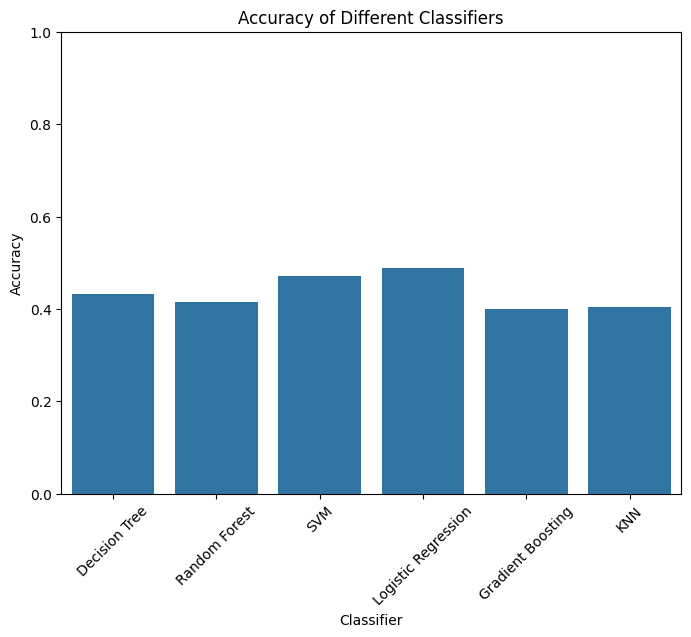

In [35]:
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target variable
features = ['Hobbies','Age','Number of shopping trips per month','Number of brand new pairs of shoes owned','Monthly stipend']
target = 'Expenditure Category'

# Split data into features and target
X = df[features]
y = df[target]

# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier()  # Add KNN classifier
}

# Compare classifiers using cross-validation
for clf_name, clf in classifiers.items():
    # Perform cross-validation
    y_pred = cross_val_predict(clf, X, y, cv=5)
    # Calculate evaluation metrics
    conf_matrix = confusion_matrix(y, y_pred)
    classification_rep = classification_report(y, y_pred)
    kappa = cohen_kappa_score(y, y_pred)
    # Compute ROC curve and AUC
    #y_prob = cross_val_predict(clf, X, y, cv=5, method='predict_proba')[:, 1]
    #fpr, tpr, thresholds = roc_curve(y, y_prob)
    #auc_score = roc_auc_score(y, y_prob)
    # Print evaluation metrics
    '''print(f"Classifier: {clf_name}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print(f"Cohen's Kappa: {kappa}")
    #print(f"AUC: {auc_score}")'''

# Dictionary to store classifier names and their accuracies
classifier_accuracies = {}

# Compare classifiers using cross-validation
for clf_name, clf in classifiers.items():
    # Perform cross-validation
    y_pred = cross_val_predict(clf, X, y, cv=5)
    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    # Store accuracy in the dictionary
    classifier_accuracies[clf_name] = accuracy

# Plotting the barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=list(classifier_accuracies.keys()), y=list(classifier_accuracies.values()))
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy
plt.show()

In [36]:
# Define features and target variable
features = ['Hobbies', 'Age', 'Number of shopping trips per month',
       'Number of brand new pairs of shoes owned','Monthly stipend']
target = 'Expenditure Category'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print(classification_report(y_test, y_pred, target_names=df[target].unique()))

Accuracy: 0.44
              precision    recall  f1-score   support

         Low       0.50      0.18      0.27        11
      Medium       0.67      0.20      0.31        10
        High       0.41      0.80      0.55        15

    accuracy                           0.44        36
   macro avg       0.53      0.39      0.37        36
weighted avg       0.51      0.44      0.39        36



In [37]:
new_data = {
    'Hobbies': 'Travelling',
    'Age': 21,
    'Number of shopping trips per month': 3,
    'Number of brand new pairs of shoes owned': 1,
    'Monthly stipend':200
}

# Convert the new data into a DataFrame
new_df = pd.DataFrame([new_data])

label_encoder = LabelEncoder()
new_df['Hobbies'] = label_encoder.fit_transform(new_df['Hobbies'])
#new_df['Preference for indoor or outdoor activities'] = label_encoder.fit_transform(new_df['Preference for indoor or outdoor activities'])

# Make predictions for the new data
new_pred = model.predict(new_df)

print("Predicted Expenditure Category:", new_pred)

Predicted Expenditure Category: ['Medium']
